In [77]:
using PyPlot
using TestImages
using ImageFeatures
using Images


### About hog
- https://github.com/JuliaImages/ImageFeatures.jl/blob/master/docs/src/tutorials/object_detection.md

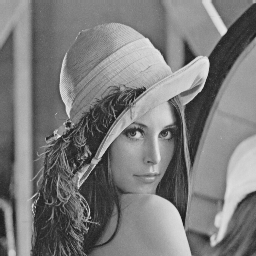

In [2]:
img = testimage("lena_gray")

In [3]:
typeof(img)

Array{ColorTypes.Gray{FixedPointNumbers.Normed{UInt8,8}},2}

## Descriptors

In [76]:
gx = imfilter(img, centered([-1 0 1]))
gy = imfilter(img, centered([-1 0 1]'));

In [38]:
?imfilter

search: imfilter imfilter! imfilter_LoG ImageFiltering



```
imfilter([T], img, kernel, [border="replicate"], [alg]) --> imgfilt
imfilter([r], img, kernel, [border="replicate"], [alg]) --> imgfilt
imfilter(r, T, img, kernel, [border="replicate"], [alg]) --> imgfilt
```

Filter an array `img` with kernel `kernel` by computing their correlation.

`kernel[0,0,..]` corresponds to the origin (zero displacement) of the kernel; you can use `centered` to place the origin at the array center, or use the OffsetArrays package to set `kernel`'s indices manually. For example, to filter with a random *centered* 3x3 kernel, you could use either of the following:

```
kernel = centered(rand(3,3))
kernel = OffsetArray(rand(3,3), -1:1, -1:1)
```

`kernel` can be specified as an array or as a "factored kernel," a tuple `(filt1, filt2, ...)` of filters to apply along each axis of the image. In cases where you know your kernel is separable, this format can speed processing.  Each of these should have the same dimensionality as the image itself, and be shaped in a manner that indicates the filtering axis, e.g., a 3x1 filter for filtering the first dimension and a 1x3 filter for filtering the second dimension. In two dimensions, any kernel passed as a single matrix is checked for separability; if you want to eliminate that check, pass the kernel as a single-element tuple, `(kernel,)`.

Optionally specify the `border`, as one of `Fill(value)`, `"replicate"`, `"circular"`, `"symmetric"`, `"reflect"`, `NA()`, or `Inner()`. The default is `"replicate"`. These choices specify the boundary conditions, and therefore affect the result at the edges of the image. See `padarray` for more information.

`alg` allows you to choose the particular algorithm: `FIR()` (finite impulse response, aka traditional digital filtering) or `FFT()` (Fourier-based filtering). If no choice is specified, one will be chosen based on the size of the image and kernel in a way that strives to deliver good performance. Alternatively you can use a custom filter type, like `KernelFactors.IIRGaussian`.

Optionally, you can control the element type of the output image by passing in a type `T` as the first argument.

You can also dispatch to different implementations by passing in a resource `r` as defined by the ComputationalResources package.  For example,

```
imfilter(ArrayFire(), img, kernel)
```

would request that the computation be performed on the GPU using the ArrayFire libraries.

See also: [`imfilter!`](@ref), [`centered`](@ref), [`padarray`](@ref), [`Pad`](@ref), [`Fill`](@ref), [`Inner`](@ref), [`KernelFactors.IIRGaussian`](@ref).


In [61]:
size(img), size(gx)

((256, 256), (256, 256))

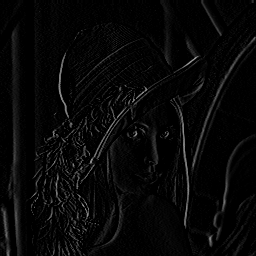

In [60]:
gx

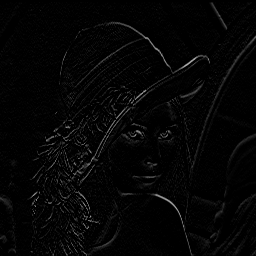

In [53]:
gy

## HOG descriptor

In [4]:
?(HOG)

search: HOG hough_circle_gradient hough_transform_standard



```
hog_params = HOG([orientations = 9], [cell_size = 8], [block_size = 2], [block_stride = 1], [norm_method = "L2-norm"])
```

Histogram of Oriented Gradient (HOG) is a dense feature desciptor usually used for object detection. See "Histograms of Oriented Gradients for Human Detection" by Dalal and Triggs.

Parameters:  

  * orientations   = number of orientation bins
  * cell_size      = size of a cell is cell_size x cell_size (in pixels)
  * block_size     = size of a block is block_size x block_size (in terms of cells)
  * block_stride   = stride of blocks. Controls how much adjacent blocks overlap.
  * norm_method    = block normalization method. Options: L2-norm, L2-hys, L1-norm, L2-sqrt.


In [16]:
#?create_descriptor

In [8]:
h = HOG(orientations=9,
        cell_size=8,
        block_size = 2,
        block_stride = 1,
        norm_method="L2-norm")

ImageFeatures.HOG(9, 8, 2, 1, "L2-norm")

In [9]:
create_descriptor(img, h) 

LoadError: [91mBoundsError: attempt to access 9×32×32 Array{Float64,3} at index [10, 1, 1][39m